In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:


X_train = pd.read_csv("One-Hot/MinMax/Train_MM_OH.csv").drop('LoanApproved',axis=1)
X_test=pd.read_csv("One-Hot/MinMax/Test_MM_OH.csv").drop('LoanApproved',axis=1)
X_valid=pd.read_csv("One-Hot/MinMax/Valid_MM_OH.csv").drop('LoanApproved',axis=1)

X_train

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Mortgage,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,RiskScore
0,0.629032,0.068100,0.455285,0.573770,0.067100,0.111111,0.4,0.123388,0.395935,0.153846,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.402174
1,0.209677,0.063154,0.661247,0.098361,0.213760,0.666667,0.8,0.089578,0.521424,0.153846,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.384058
2,0.354839,0.152409,0.720867,0.295082,0.077842,0.222222,0.8,0.161380,0.172911,0.076923,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.438406
3,0.661290,0.409754,0.875339,0.590164,0.088966,0.444444,0.0,0.123039,0.317895,0.153846,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.086957
4,0.225806,0.083607,0.626016,0.196721,0.185708,0.333333,0.2,0.171140,0.203913,0.076923,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.438406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.387097,0.053986,0.555556,0.311475,0.308006,0.333333,0.0,0.113280,0.252022,0.384615,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.402174
11996,0.064516,0.039497,0.433604,0.000000,0.135509,0.666667,0.6,0.108749,0.383891,0.076923,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.438406
11997,0.693548,0.126904,0.604336,0.704918,0.097438,0.333333,0.0,0.237016,0.117429,0.461538,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.188406
11998,0.322581,0.054541,0.588076,0.245902,0.075175,1.000000,0.2,0.093761,0.650183,0.461538,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.528986


In [6]:
y_train=X_train.iloc[:,-1]
y_test=X_test.iloc[:,-1]
y_valid=X_valid.iloc[:,-1]

X_train = X_train.iloc[:,:-1]
X_test = X_test.iloc[:,:-1]
X_valid = X_valid.iloc[:,:-1]


In [7]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_valid)
y_test_pred = regressor.predict(X_test)


In [9]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_valid, y_val_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on Training Data: {rmse_train:.4f}")
print(f"RMSE on Validation Data: {rmse_val:.4f}")
print(f"RMSE on Test Data: {rmse_test:.4f}")

RMSE on Training Data: 0.0650
RMSE on Validation Data: 0.0656
RMSE on Test Data: 0.0659


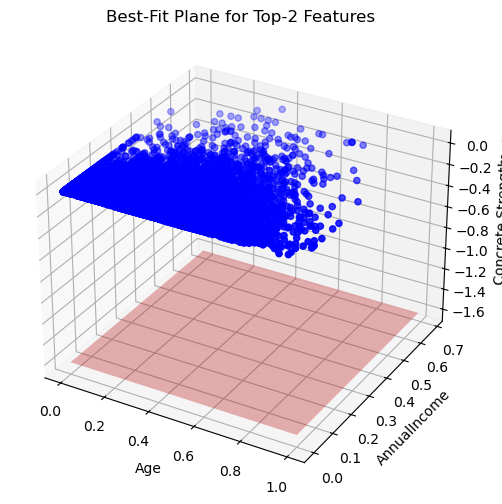

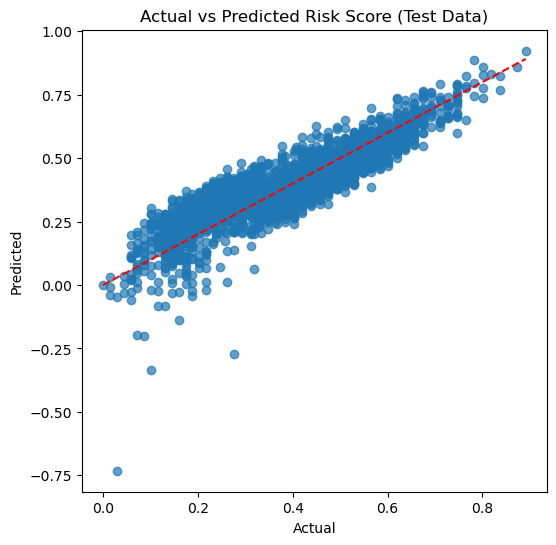

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, label="Actual", color="blue")

x_surf, y_surf = np.meshgrid(
    np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 20),
    np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 20)
)
z_surf = (regressor.intercept_ +
          regressor.coef_[0] * x_surf +
          regressor.coef_[1] * y_surf)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color='red')
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])
ax.set_zlabel("Concrete Strength")
ax.set_title("Best-Fit Plane for Top-2 Features")

plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Risk Score (Test Data)")
plt.show()

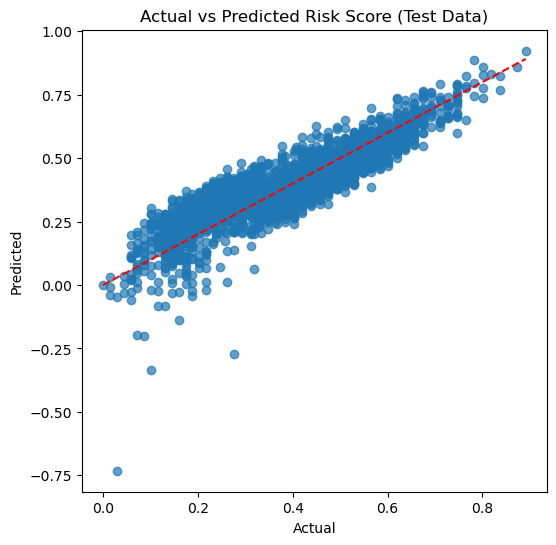

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Risk Score (Test Data)")
plt.show()